# II Pakartoniniai neuroniniai ir transformatoriai

## Temos

<code>**1  : Seku generavimas su žodžio ir simbolių RNNs**</code><br>
<code>**2  : Simbolių RNN (PyTorch)**</code><br>
<code>**3  : Dėmesio mechanizmas**</code><br>
<code>**4  : Dėmesys be RNN**</code><br>
<code>**5  : Dėmesys ir mastelio taško produkto dėmesys**</code><br>
<code>**6  : Daugelio taškų dėmesys**</code><br>
<code>**7  : Transformatoriaus architektūra**</code><br>
<code>**8  : Populiarus transformatorių modeliai: BERT, BART, GPT**</code><br>
<code>**9  : GPT-v1 generatyvinis paruoštas transformatorius**</code><br>
<code>**10 : BERT: dvikryptis kodavimo atvaizdavimas iš transformatorių**</code><br>
<code>**11 : GPT-v2: kalbos modeliai yra be priežiūros besimokantys "multitaskeriai"**</code><br>
<code>**12 : GPT-v3: kalbos modeliai mokosi keliais bandymais**</code><br>
<code>**13 : BART: kombinuojami dvikrypčiai ir auto regresyvus transformatoriai**</code><br>
<code>**14 : DistilBERT: filmų apžvalgų klasifikatorius (PyTorch)**</code><br>

In [1]:
#TODO approx 3:50:00

Prieš tais mes kalbėjomės kaip galime taikyti RNN klasifikacijos uždaviniams, dabar aptarsime kaip su RNN galime `generuoti naujus duomenys`. Susipažinsime su `dėmesio mechanizmu` kad pagerintu sekų generavimo procesą ir tada atsisakysime RNN dalies kad pažiūrėti kaip dėmemsio mechanizmas veikia vienas ir ši koncepcija yra `transformatorių` fundamentas, o pastarieji tapo labai populiarus ypač paskutiniais metais. <br>
Pradesime nuo bendro aptarimo kaip generuojamos sekos su RNN, taikysime `simbolių RNN` tai tinklas kuris dirba su vienu simboliu laiko momemtu, tarkime alfabeto raidėmis ir generuoja iš jų naują tekstą. Po aptarsime dėmesio mechanizmo koncepciją pakartotiniame tinkle, kaip šis tinklas gali laiko momentais atkreipti dėmėsį į tam tikras sekos dalis. Ši technika buvo ir yra labai naudinga dirbant su labai ilgomis sekomis. Po to susipažinsime su `Attention is All We Need` publikacija kuri yra apie tai kad galima naudoti vient tik `self-attention (savi dėmesio ?)` mechanizmą be RNN ir šie tyrimai irodė kad galime gauti labai gerus rezultatus. Ši koncepcija davė pradžią `transformatorių modeliams` kuriuos taip pat aptarsime ir pasižiurėsime kaip galime implementuoti tai su PyTorch.

##  Sekų generavimas su žodžio ir simbolių RNNs

Jau esame prieš tai apžvelgę sekų modeliviavima su RNN  praietos paskaitose temoje <code>**Sekos modeliavimas su RNN**</code>. Naudojome <code>**many to one**</code> modelį teksto klasifikavimui ir šis klasifikatorius dirbo su žodžiais (žodžių lygmenyje). Turėjome `embedding` įterpimų vektorių kuriame kiekvienas žodis buvo įvestis kuri konvertuodavo į testinių reikšmių vektorių.

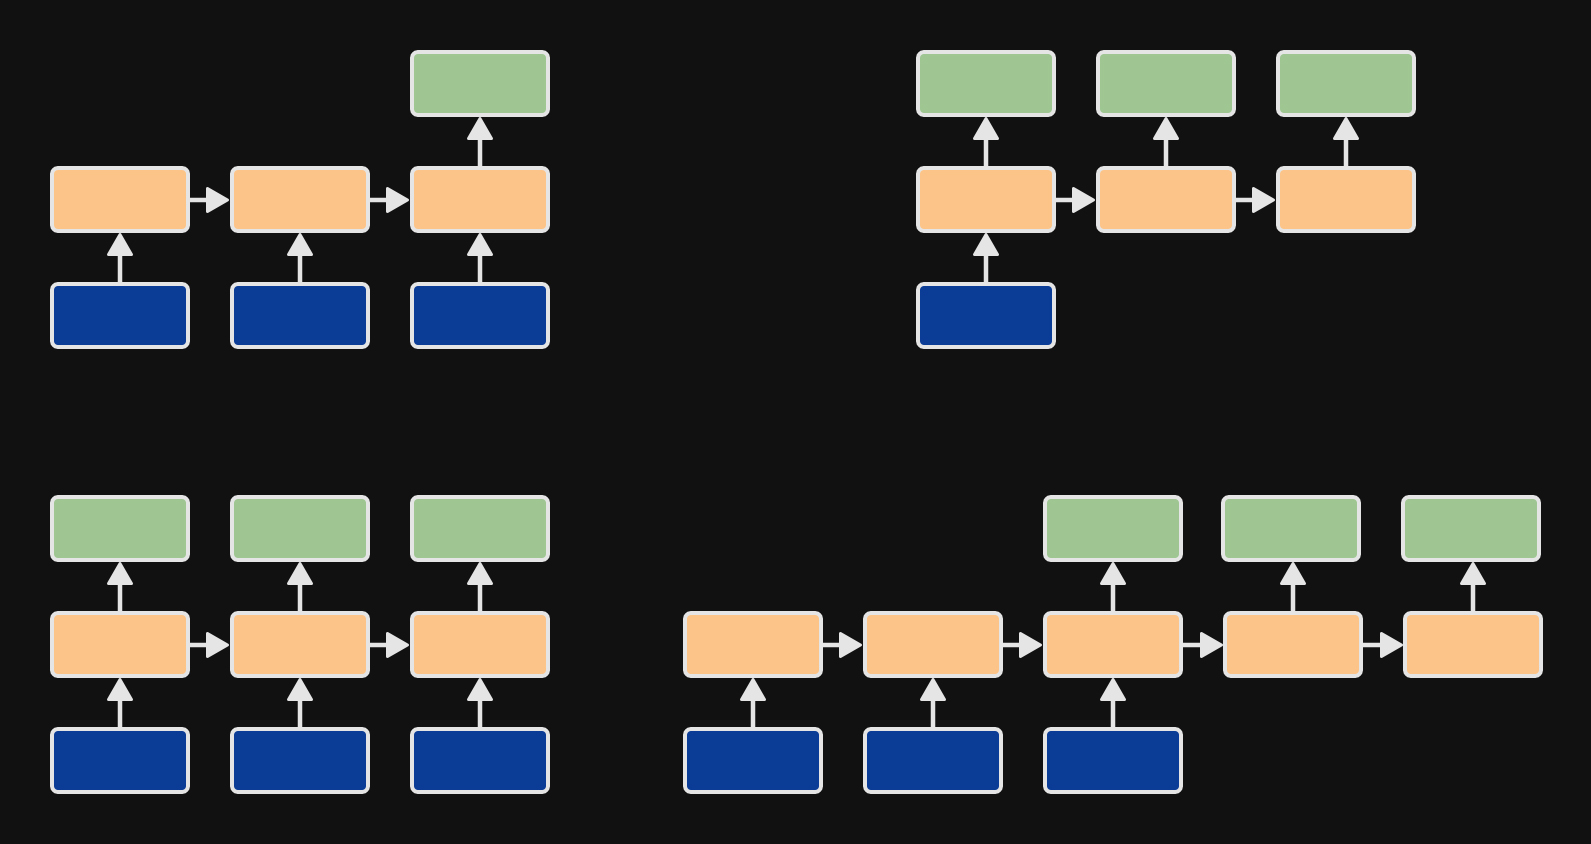

Šiandien aptarsime  <code>**many to many**</code> modelio architektūra kad generuoti tekstą. Ir kitą t.y pavėlintą <code>**many to many**</code> modelį aptarsime vėliau kai kalbėsimės apie RNN su dėmesio mechanizmu. Kalbant apie RNN siekiant padaryti teksto generatorių yra du būdai. Vienas yra taip vadinamas simbolių lygmuo, t.y simbolių RNN. Ir tai pat žodžių lygmens RNN. Ir skirtumas iš tikrųjų ka mes duodame kaip vieną įvesties `token`. 

Kiekviena laiko momentui vienas žodis gali būti įvestis `Man patinka šventės` ir kai mes treniruojame žodžių RNN mes norime kad modelis atspėtu sekančius žodžius. Tarkime sakinys `Man patinka šventės ir dovanos`.  Pirmas žodis `Man`, tai RNN turi atspėti kad sekantis žodis bus patinka, tada antro žodis kaip įvestis yra `patinka` tai išvestis turi būti `šventės` ir tada `šventės` yra įvestis o išvestis turi būti `ir` ir t.t. Tai mes duodame po vieną žodį kaip įvestį ir RNN turi išmokti nustatyti sekantį žodį. Tai dažniausiai veikia žodžio lygmens RNN apmokymas. 

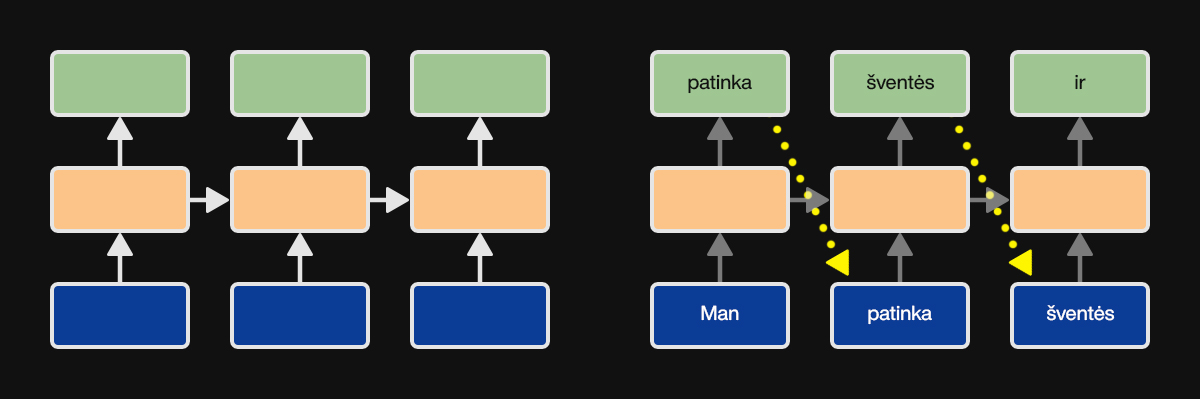

Simbolių RNN apmokymas yra šiek tiek kitok bet koncepcija ta pati. Tik vietoje įvesties mes duodame simbolius (raides), pvz.: `m a n  p a t i n k a  š v e n t ė s`. Tada RNN nuspės laiko momentu po vieną sekantį simbolį. Abu metodai turi savo trukumų ir privalumų kuriuos šiek tiek vėlia aptarsime bet kol kas dėl paprastumo nagrinėsime simbolių RNN. Kadangi mes turime pilnus žodžius todėl kiekvienas sekantis simbolis žodyje yra mūsų etiketę, tai tari savi-prižiurimas (self-supervised) mokymasis. Etiketės iš esmės yra žodžio/sakinio struktūra. <code>**Tai kaip mus su tuo dabar generuoti naują tekstą o ne regeneruoti jau egzistuojanti ?**</code> . Ta galime padyti paduodami kaip įvestį atsitiktinę raidę ir RNN mėgina atspėti sekančią, paprastai su tam tikra tikimybe atliekama atranka. RNN mes apsvarstu visas populiariausias prognozuojamas raides, tarkime, su tam tikra tikimybe, tada atsitiktine tvarka atrinktu šių nuspėjamų raidžių svertinę atranką ir naudotu tą raidę kaip įvestį kitai raidei/žodžiui ir tai kartojama sekančiame laiko momente. Tai bus galima kurti/generuoti skirtingas simbolių/žodžių sekas. Iš esmės neuroninis tinklas išmoksta tikimybes kad konkreti raidė/žodis atsiranda po kiekvieno. Tikėtina kad ilgai treniruojamas toks neuronisi tinklas sugebės generuoti realistišką tekstą su mažu kiekiu rašybos klaidų, pamatysime tai programinėje implementacijoje.

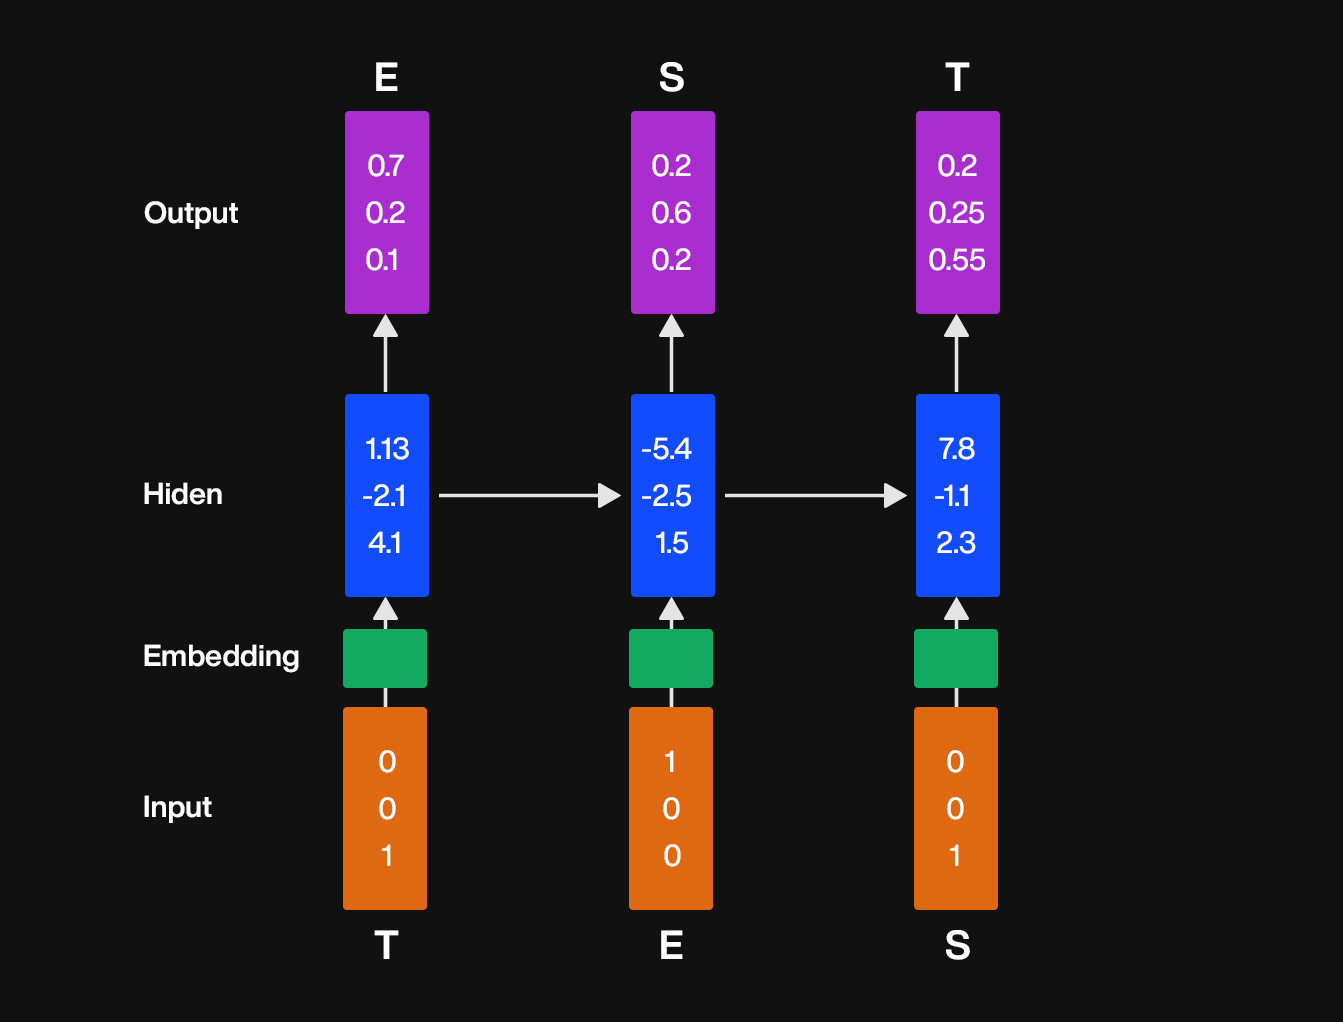

<code>**Simbolių RNN**</code><br>
Darykime prielaida kad tai apdoroją tekstą `testas`. Šis nueronis tinklas yra apmokytas atpažinti sekantį simbolį. Turime įvestį T, E, S. Šios raidės/simboliai yra reprezentuojami per `one hot` koduotę. Turime viena `one hot` koduotės vektorių su trijais elementais. Kitu atveju vektoriaus ilgis būtų lygus galimybių simbolių skaičiui.  Jeigu vertintume mažųjų raidžių alfabetą šis vektorius būtų 32, o jeigu ir didžiosios ir mažosios tai 64, tai pat jei dar pridėsime kai kuriuos skyrybos ženklus, bus 68. Tai `one hot` koduotės vektoriaus ilgis priklauso nuo to kiek simbolių mes vertiname. Ivesties vektorius yra lygus išvesties vektoriui kuris rodo apskaičiuotas `softmax` tikimybes kiekvienai raidai/simboliui. Taigi šiuo atveju pozicija 1 buvo raidė E kuri turi 70% tikimybę kad turi būti E, 20% kad S ir 10% kad T. Sekančiai raidai įvestis yra E todėl turėtu nustatyti kad S turi aukščiausią tikimybę. Tai šioje iliustracijoje yra principe schemą kaip turi dirbti toks NN, galiausiai galime pritaikyti `argmax` kad konvertuoti šią tikimybę į raidę. Kuo tai skiriasi nuo prieš tai maytyto RNN yra tai kas šis NN mėgina nustatyti sekančia raidę, kas yra šiuo atvejų kaip klasės etiketę. Ir kadangi NN mėgina nustatyti tai kas jau ir taip yra duomenyse todėl tai kaip ir savi-prižiurintis (self-supervised) mokymasis. <br>

Taigi generavimo metu mes apmokome tinklą ir kai naudojame jį išvadoms generuoti naują tekstą, kuri paimame iš jo išvesties vektoriaus. Tai negarantuoja, kad pasirinksime raidę E kaip įvestį kitam `token` įvesčiai testavimo metu.Jeigu tai būtų garantuota tada NN tiesio prisimintu tekstą, bet mes norime turėti įvairovės savo tekste, todėl yra tos simbolių tikimybės, praktikoje galime padaryti kad NN vertintu tik top 5 simbolius ir imti pavyzdžius/mėginius iš jų. 

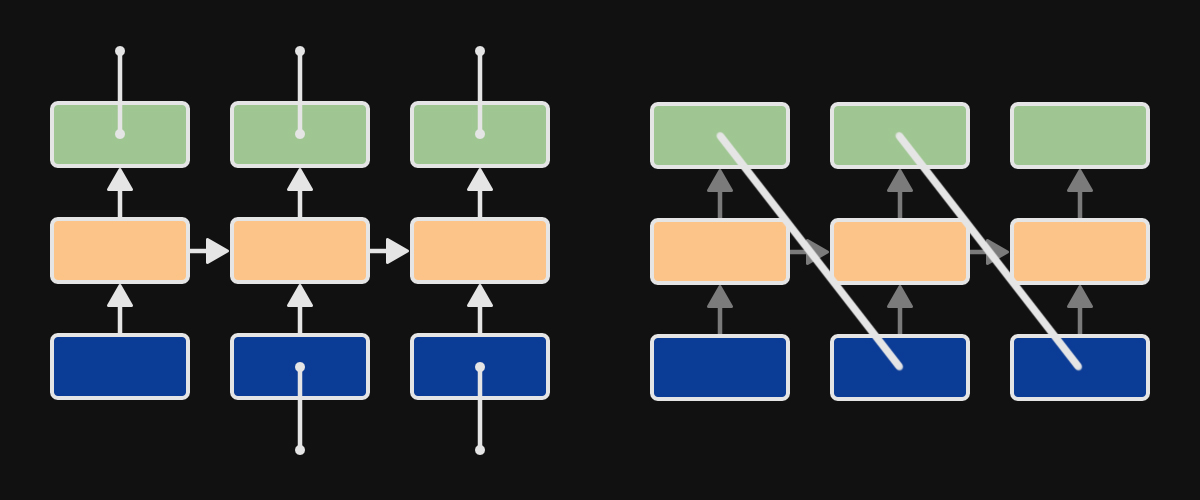

Apibendrinant ką mes kalbėjome apie tai kaip dirbame su šiuo simbolių RNN. Treniruotės metu mes paprastai ignoruojame prognozę, turiu galvoje, kad prognozė naudojama tik nuostoliams (kainai) apskaičiuoti, bet treniruočių metu mes jo čia neįtraukiame. Šios fazės metu kai atliekama prognozę mes imame įvestį iš originalaus įvesties teksto. Ir tik išvadų (inference) etape mes paprastai naudojame NN prognozę kaip sekančią įvestį. Tai mums leidžia sukurti teksto generavimą su įvairovę kad tai niekada nebus tas pats tekstas. <br>

<code>**Pastaba:**</code> šis metodas veikia ir su žodžių ir simbolių RNN. Skirtumas būtų tas kad įvesties vektorius `one hot` koduotėje būtų su tiek narių kiek yra žodžių kurie gali atsirasti. Jeigu vertinti tarkime anglišką žodyną ten yra milijonai žodžių todėl reikia apriboti žodyną kad tai nebūtų per didelės duomenų struktūros, bet net jeigu turime žodyną su tarkime 20 000 žodžių tai bus gerokai daugiau nei gali būti simbolių. Tai yra vienas iš iššūkių dirbant su žodžių RNN. Tai nebuvo problema kai aptarėme ir implementavme RNN kaip teksto klasifikatorių. <br>

Įterpimas (embeddding) vis tiek veikia gerai, jei turime 20 000 žodyno dydį. Tačiau problema yra tada, kai mes turime šiuos rezultatus, pavyzdžiui, apskaičiuojame šių 20 000 galimų žodžių etiketę ir apskaičiuojame kryžminę entropiją tarp dviejų, o tai yra sudėtinga, nes tai gali būti darbas su labai mažomis reikšmės ir tarp jų gali nebūti nė vienos didelės reikšmės. Taigi yra mašininio mokymosi sritis, vadinama energiją pagrįsti modeliai `energy based models`, kurie tarsi pasiskolina idėjų iš fizikos, pavyzdžiui, kaip sukurti du vektorius arba kaip įvertinti, ar jie yra panašūs vienas į kitą. Žodžiu kad žodžiu RNN vektoriai yra labai dideli todėl paprastai daug lengviau treniruoti simbolių RNN siekiant sukurti teksto generatorių.<br>

<code>**Privalumai ir trūkumai tarp simbolių ir žodžių RNN**</code>
 - Privalumas simbolių įterpimui (tik 36 raidės ir skyrybos ženklai) reikia mažiau atminties, palyginti su žodžių įterpimu;
 - Mažesni išvesties sluoksniai dėl tos pačios priežasties, kaip nurodyta aukščiau;
 - Gali sukurti keistus nesąmoningus žodžius ir jų derinius;
 - Prasčiau fiksuoja ilgų grandinių priklausomybes, vėliau aptarsime dėmesio mechanizmas kuris padeda tai spręsti.

## Simbolių RNN (PyTorch) implementacija

Dar šiek tiek dėl long-short term memory celės, mes jau panaudojome šį instrumentą teksto klasifikacijos uždaviniui. Jeigu pamenate illiustracija iš praeitos paskaitose šioje celės daug dalykų vyksta.

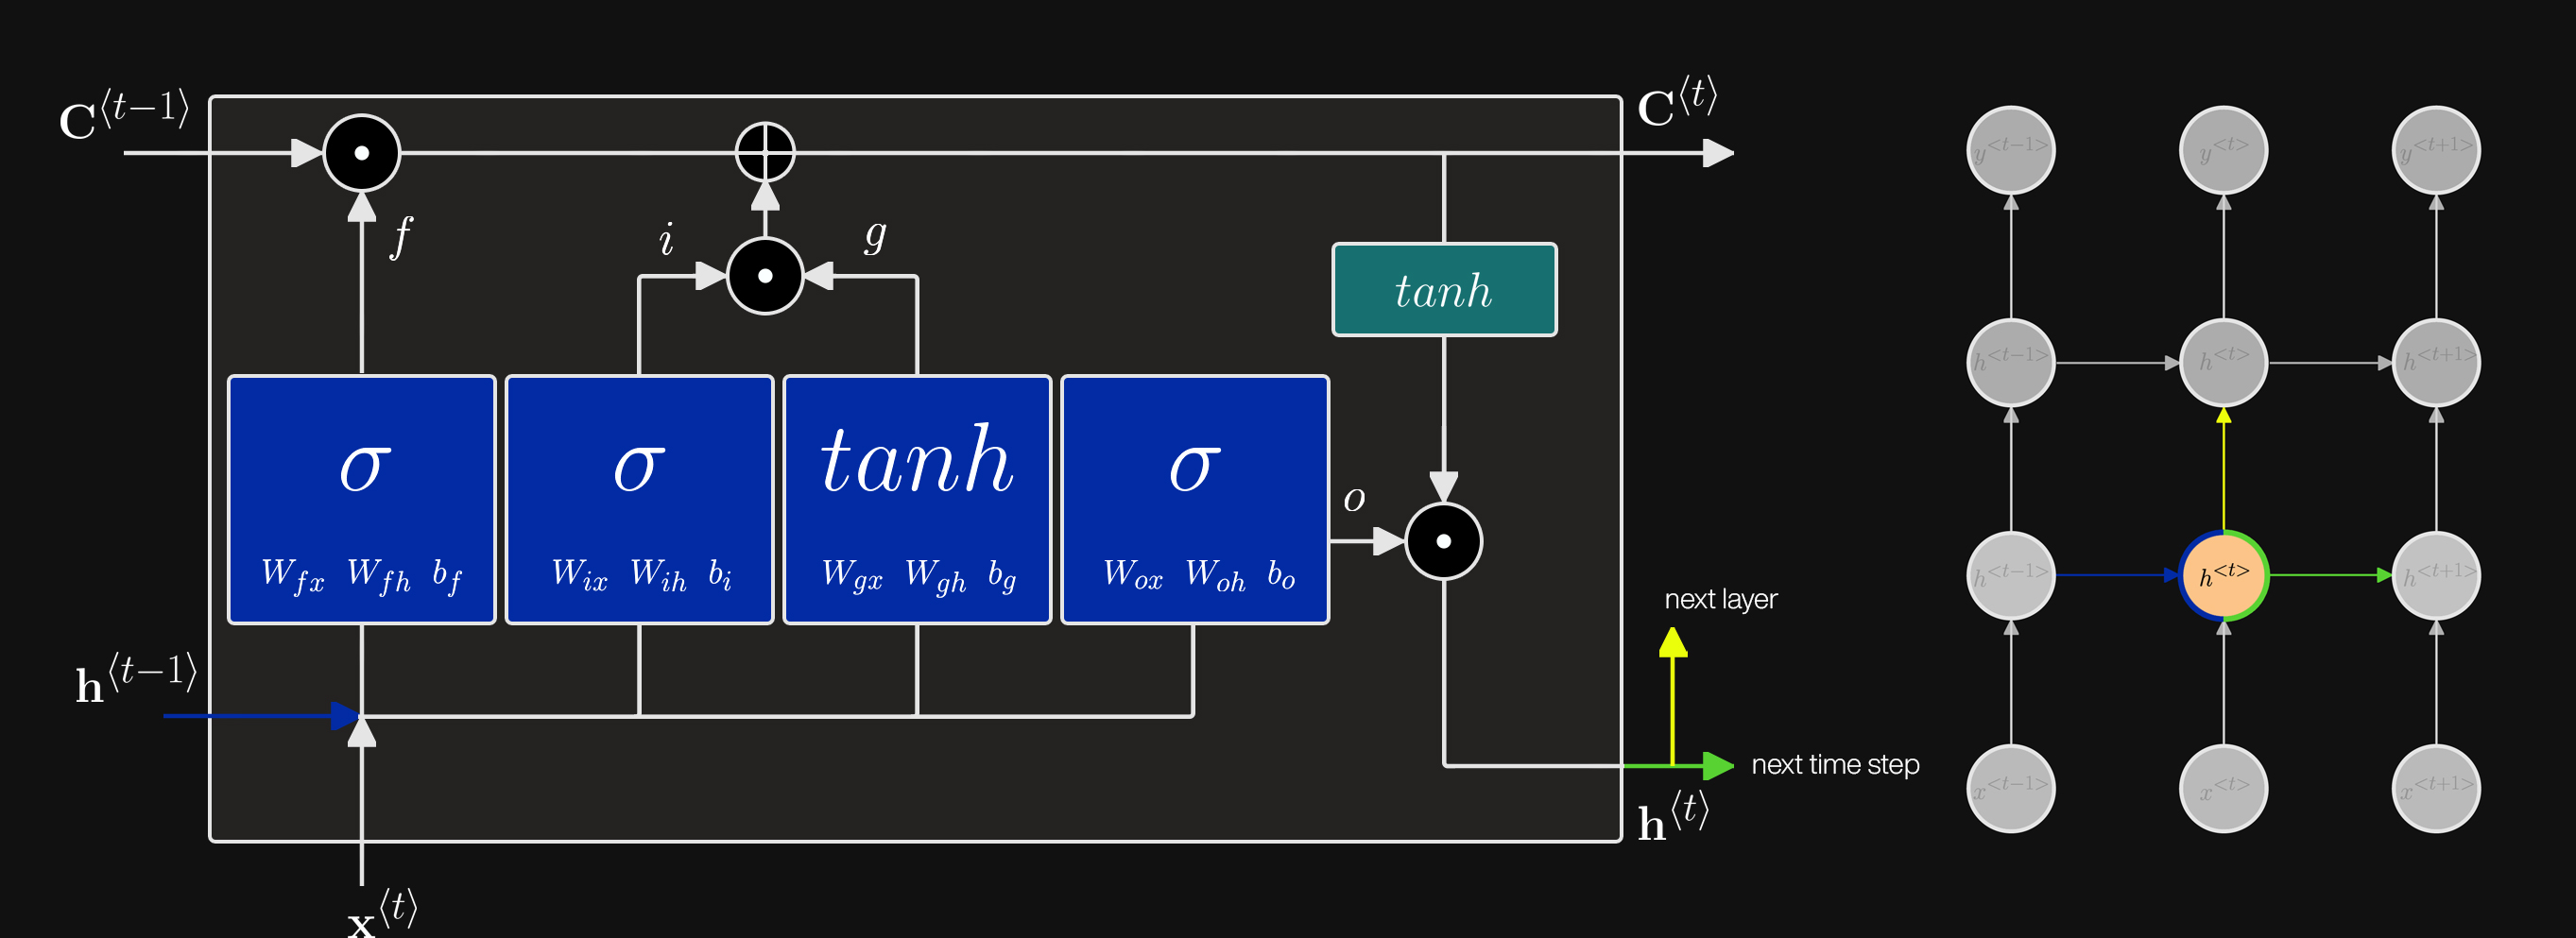

[LSTM](https://pytorch.org/docs/stable/generated/torch.nn.LSTM.html)<br>

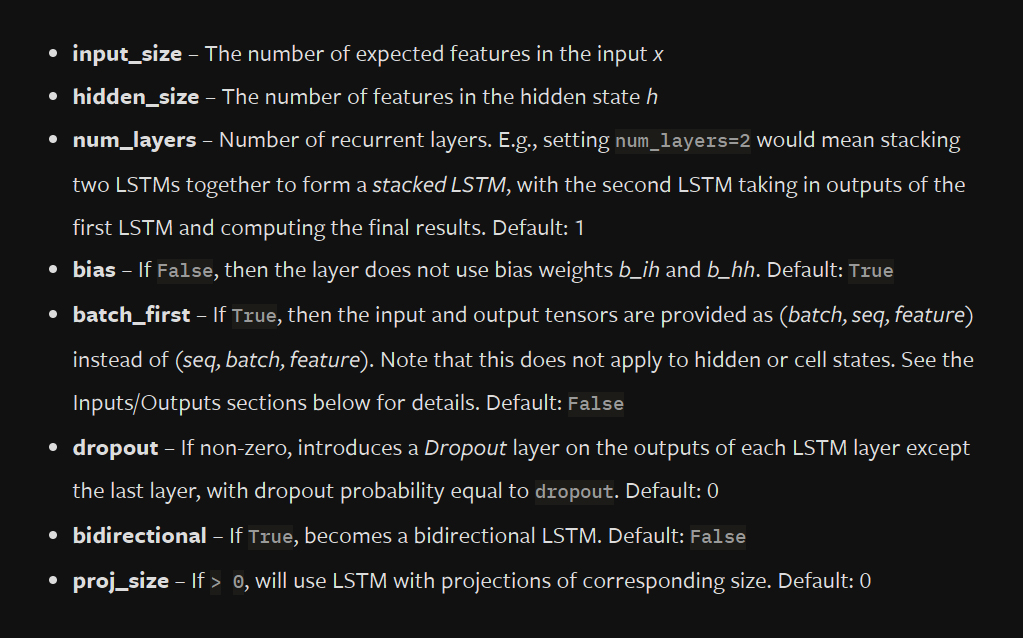

In [ ]:
import torch

# input size (expected features), hidden size (features in hidden state), number of layers
lstm = nn.LSTM(10, 20, 2)

inp  = torch.randn(5, 3, 10)
h0   = torch.randn(2, 3, 20)
co   = torch.randn(2, 3, 20)

# here it is used and receives two inputs, one is input and other is a tuple
# consisting of h0 and c0 (these are initial hidden state and cell state)
output, (hn, cn) = lstm(inp, (h0, c0))

# next to output we have another tuple hn and cn, it is the the hidden and cell state of the last time step.

[LSTM illiustration](https://i.stack.imgur.com/SjnTl.png)

https://stackoverflow.com/questions/48302810/whats-the-difference-between-hidden-and-output-in-pytorch-lstm

LSTM Cell klasė yra tarytum dalis LSTM klasės tik mažesnis vienetas, ir galima naudoti abu arba `LSTM` arba `LSTMCell` programuojant simbolių RNN. 

[LSTMCell](https://pytorch.org/docs/stable/generated/torch.nn.LSTMCell.html)

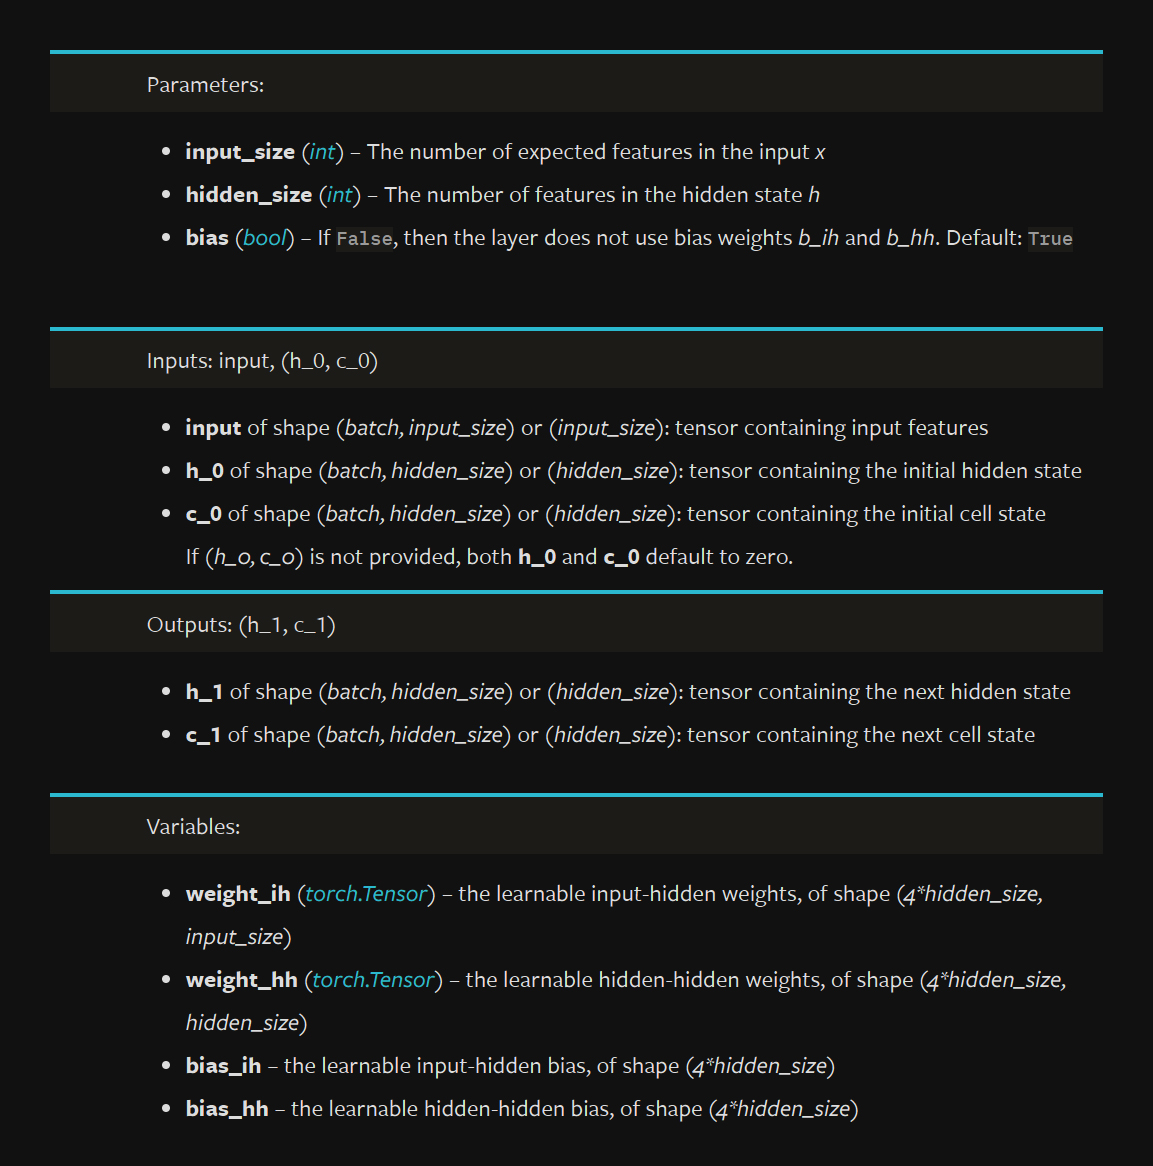

In [ ]:
lstmcell = nn.LSTMCell(10,20)    # (input size, hidden size)
inp      = torch.randn(2, 3, 10) # (time steps, batch, input size)
hx       = torch.randn(3, 20)    # (batch, hidden size)
cx       = torch.randn(3, 20)    #

out     = []

for i in range(inp.size()[0]):
    hx, cx = lstmcell(inp[i], (hx, cx))
    out.append(hx)

out = torch.stack(out, dim=0)

Vertimo (iš anglų į prancūzų) tinklas iš sekos į seką ir dėmesio mechanizmas: https://pytorch.org/tutorials/intermediate/seq2seq_translation_tutorial.html

[Pytorch Character RNN](./code/__II_rnn(character).ipynb)

## Dėmesio mechanizmas

## Dėmesys be RNN

## Dėmesys ir mastelio taško produkto dėmesys

## Daugelio taškų dėmesys

## Transformatoriaus architektūra

## Populiarus transformatorių modeliai: BERT, BART, GPT

## GPT-v1 generatyvinis paruoštas transformatorius

## BERT: dvikryptis kodavimo atvaizdavimas iš transformatorių

## GPT-v2: kalbos modeliai yra be priežiūros besimokantys "multitaskeriai"

## GPT-v3: kalbos modeliai mokosi keliais bandymais

## BART: kombinuojami dvikrypčiai ir auto regresyvus transformatoriai

## DistilBERT: filmų apžvalgų klasifikatorius (PyTorch)